#Optimizing Linear Regression with Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


In [3]:
path = "/content/tvmarketing.csv"

adv = pd.read_csv(path)

In [4]:
adv.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

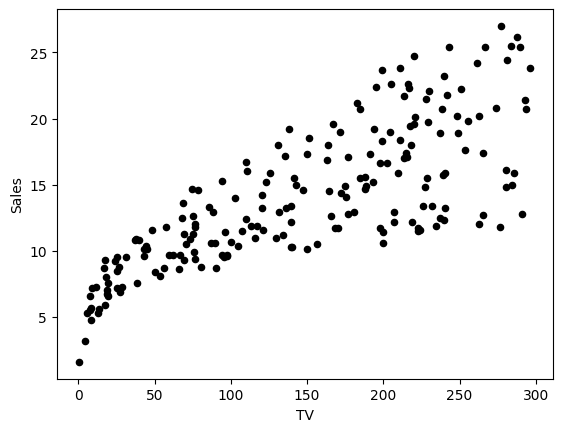

In [7]:
adv.plot(x="TV", y="Sales", kind='scatter', c='black')

In [8]:
X = adv['TV']
Y = adv['Sales']

In [9]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)
print(f"Slope: {m_numpy}")
print(f"Intercept: {b_numpy}")

Slope: 0.04753664043301975
Intercept: 7.0325935491276965


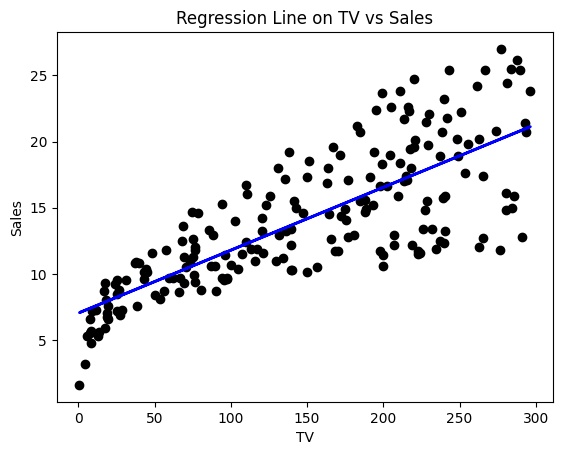

In [10]:
plt.scatter(X, Y, color='black')
plt.plot(X, m_numpy * X + b_numpy, color='blue', linewidth=2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Regression Line on TV vs Sales")
plt.show()

In [11]:
def pred_numpy(m, b, X):
  Y = m * X + b
  return Y

In [13]:
X_pred = np.array([50, 120, 280])
Y_pred = pred_numpy(m_numpy, b_numpy, X_pred)
print(f"TV marketing expenses:\n {X_pred}")
print(f"Predicted Sales:\n {Y_pred}")

TV marketing expenses:
 [ 50 120 280]
Predicted Sales:
 [ 9.40942557 12.7369904  20.34285287]


## Linear regression with Scikit-learn

In [14]:
lr_sklearn = LinearRegression()

In [15]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

try:
  lr_sklearn.fit(X,Y)
except ValueError as e:
  print(e)

Shape of X: (200,)
Shape of Y: (200,)
Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.


In [18]:
X_sklearn = X.values.reshape(-1, 1)
Y_sklearn = Y.values.reshape(-1, 1)

print(f"Shape of X: {X_sklearn.shape}")
print(f"Shape of Y: {Y_sklearn.shape}")
#

Shape of X: (200, 1)
Shape of Y: (200, 1)


In [20]:
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [26]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Slope: {m_sklearn}")
print(f"Intercept: {b_sklearn}")

Slope: [[0.04753664]]
Intercept: [7.03259355]


In [32]:
def pred_sklearn(X, lr_sklearn):
  X_2D = X.reshape(-1, 1)
  Y = lr_sklearn.predict(X_2D)
  return Y

In [33]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n {X_pred}")
print(f"Predicted Sales:\n {Y_pred_sklearn.T}")

TV marketing expenses:
 [ 50 120 280]
Predicted Sales:
 [[ 9.40942557 12.7369904  20.34285287]]


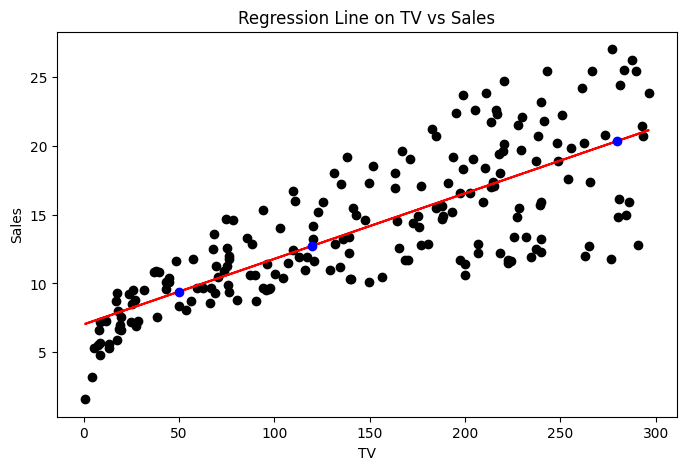

In [37]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plt.plot(X,Y, 'o', color='black')
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.set_title("Regression Line on TV vs Sales")

ax.plot(X, m_sklearn[0][0] * X + b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

In [38]:
#normalization
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [39]:
def E(m, b, X, Y):
  return 1/(2*len(Y))*np.sum((m*X + b -Y)**2)

In [40]:
def dEdm(m, b, X, Y):
  res = 1/len(Y)*np.dot(m*X + b - Y, X)
  return res
def dEdb(m, b, X, Y):
  res = 1/len(Y)*np.sum(m*X + b - Y)
  return res

In [41]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616061
1.6431300764452317e-16
0.21777557513839352
5.000000000000001


In [42]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False ):
  for iteration in range(num_iterations):
    m_new = m - learning_rate * dEdm(m, b, X, Y)
    b_new = b - learning_rate * dEdb(m, b, X, Y)
    m = m_new
    b = b_new
    if print_cost:
      print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

  return m, b

In [43]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate=0.01, num_iterations=10))

(np.float64(0.49460408269589484), np.float64(-1.3759215988784438e-16))
(np.float64(0.9791767513915026), np.float64(4.521910375044022))


In [47]:
m_initial = 0
b_initial = 0
num_iterations = 30
learning_rate = 1.2

m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)
print(f"Gradient Descent: m_min, b_min = {m_gd}, {b_gd}")


Cost after iteration 0: 0.20629997559196583
Cost after iteration 1: 0.1945519746156446
Cost after iteration 2: 0.19408205457659178
Cost after iteration 3: 0.19406325777502964
Cost after iteration 4: 0.19406250590296714
Cost after iteration 5: 0.1940624758280847
Cost after iteration 6: 0.19406247462508938
Cost after iteration 7: 0.19406247457696957
Cost after iteration 8: 0.19406247457504477
Cost after iteration 9: 0.19406247457496775
Cost after iteration 10: 0.1940624745749647
Cost after iteration 11: 0.19406247457496456
Cost after iteration 12: 0.19406247457496456
Cost after iteration 13: 0.1940624745749646
Cost after iteration 14: 0.19406247457496456
Cost after iteration 15: 0.19406247457496456
Cost after iteration 16: 0.19406247457496456
Cost after iteration 17: 0.19406247457496456
Cost after iteration 18: 0.19406247457496456
Cost after iteration 19: 0.19406247457496456
Cost after iteration 20: 0.1940624745749646
Cost after iteration 21: 0.19406247457496456
Cost after iteration 22: 

In [50]:
X_pred = np.array([50, 120, 280])
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_norm = m_gd * X_pred_norm + b_gd
Y_pred_gd = Y_pred_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n {X_pred}")
print(f"Predicted Sales with LR:\n {Y_pred_sklearn.T}")
print(f"Predicted Sales with GD:\n {Y_pred_gd}")

TV marketing expenses:
 [ 50 120 280]
Predicted Sales with LR:
 [[ 9.40942557 12.7369904  20.34285287]]
Predicted Sales with GD:
 [ 9.40942557 12.7369904  20.34285287]
